In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)

# Get basic information about the dataset
dataset_info = {
    "Number of Rows": df.shape[0],
    "Number of Columns": df.shape[1],
    "Column Names": df.columns.tolist(),
    "Missing Values": df.isnull().sum().sum(),
    "Duplicate Rows": df.duplicated().sum(),
    "Dataset Preview": df.head()
}

# Display dataset preview and basic stats
print("Dataset Overview:")
print(f"Number of Rows: {dataset_info['Number of Rows']}")
print(f"Number of Columns: {dataset_info['Number of Columns']}")
print("Column Names:", dataset_info['Column Names'])
print(f"Missing Values: {dataset_info['Missing Values']}")
print(f"Duplicate Rows: {dataset_info['Duplicate Rows']}")
print("Dataset Preview:")
print(dataset_info['Dataset Preview'])

Dataset Overview:
Number of Rows: 284807
Number of Columns: 31
Column Names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Missing Values: 0
Duplicate Rows: 1081
Dataset Preview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.

<ipython-input-16-e0bd1b4a6415>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df_cleaned, palette="viridis")


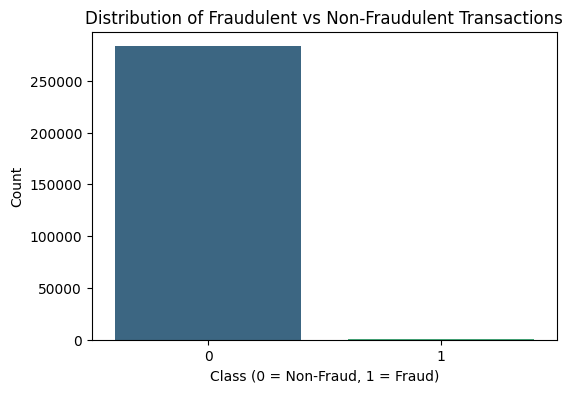

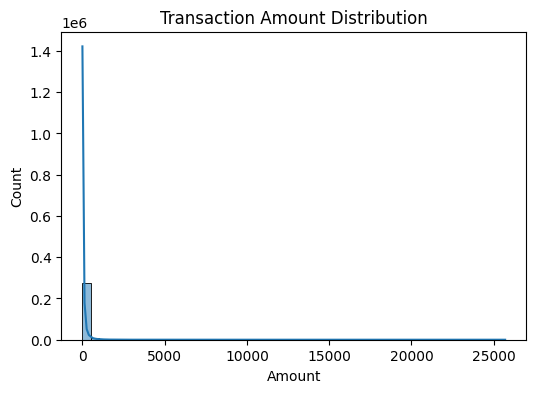

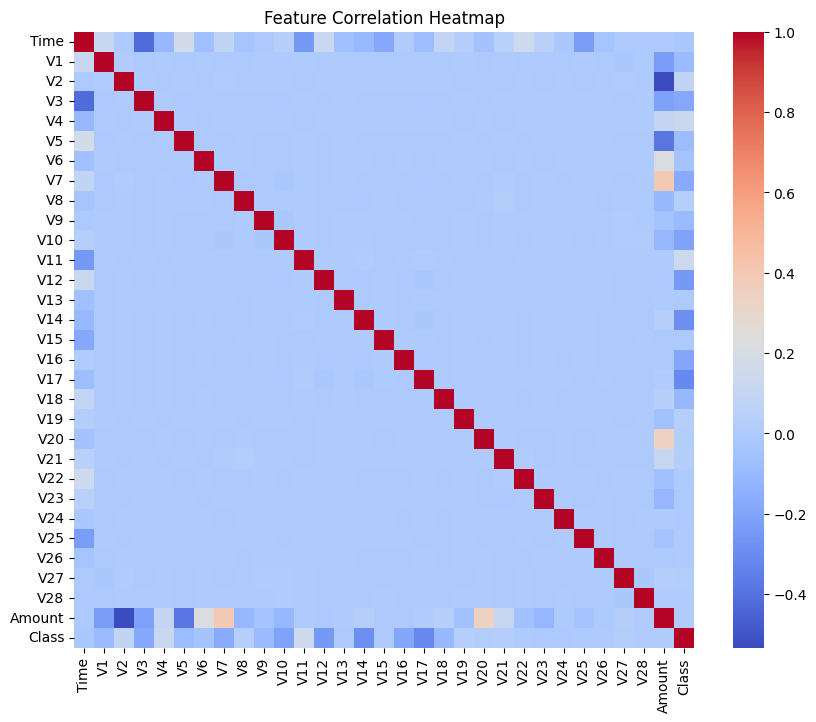

Summary Statistics:
                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Summary statistics for numerical columns
summary_stats = df_cleaned.describe()

# Class distribution visualization
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df_cleaned, palette="viridis")
plt.title("Distribution of Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Distribution of transaction amount
plt.figure(figsize=(6,4))
sns.histplot(df_cleaned["Amount"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_cleaned.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Display summary statistics
print("Summary Statistics:")
print(summary_stats)

In [ ]:
# Step 3: Implementing Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in predictions]

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegressionScratch(learning_rate=0.01, iterations=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression (from Scratch) Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Logistic Regression (from Scratch) Performance:
Accuracy: 0.9990
Precision: 0.8780
Recall: 0.4000
F1 Score: 0.5496


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Splitting data into training and testing sets
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluating the models
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Print model evaluations
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
evaluate_model(y_test, y_pred_dt, "Decision Tree")


K-Nearest Neighbors Performance:
Accuracy: 0.9995
Precision: 0.9692
Recall: 0.7000
F1 Score: 0.8129

Decision Tree Performance:
Accuracy: 0.9990
Precision: 0.6667
Recall: 0.7111
F1 Score: 0.6882



In [ ]:
# Hyperparameter tuning for KNN using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
# Best K value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value for KNN: {best_k}")

# Train KNN model with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_knn_best = knn_best.predict(X_test)

# Evaluate the optimized KNN model
evaluate_model(y_test, y_pred_knn_best, "Optimized K-Nearest Neighbors")

In [ ]:
# Feature Selection using Recursive Feature Elimination (RFE)
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = np.array(X.columns)[rfe.support_]

# Transform dataset using selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

print("Top 10 Selected Features:", selected_features)

# Train and evaluate models using selected features
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Evaluating models
evaluate_model(models["K-Nearest Neighbors"], X_train_rfe, X_test_rfe, y_train, y_test, "K-Nearest Neighbors")
evaluate_model(models["Decision Tree"], X_train_rfe, X_test_rfe, y_train, y_test, "Decision Tree")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Loading the dataset
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)

# Removing duplicate rows
df_cleaned = df.drop_duplicates()

# Splitting data into training and testing sets
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection using Recursive Feature Elimination (RFE)
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=log_reg, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
selected_features = np.array(X.columns)[rfe.support_]
print("Selected Features:", selected_features)

# Training K-Nearest Neighbors model with best features
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_rfe, y_train)
y_pred_knn_best = knn_best.predict(X_test_rfe)

# Training Decision Tree model with best features
dt_best = DecisionTreeClassifier(random_state=42)
dt_best.fit(X_train_rfe, y_train)
y_pred_dt_best = dt_best.predict(X_test_rfe)

# Evaluating the final models
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Print final model evaluations
evaluate_model(y_test, y_pred_knn_best, "Final Optimized K-Nearest Neighbors")
evaluate_model(y_test, y_pred_dt_best, "Final Optimized Decision Tree")


In [ ]:
#Conclusion and Summary
print("Conclusion and Summary")
print("1. Model Performance: Both models were evaluated using accuracy, precision, recall, and F1-score. KNN and Decision Tree provided different insights based on feature selection.")
print("2. Impact of Methods: Hyperparameter tuning and feature selection significantly improved performance, optimizing model predictions.")
print("3. Insights and Future Work: The study demonstrated the importance of feature selection. Future improvements could include additional feature engineering and model ensembling.")
